In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('sudoku1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

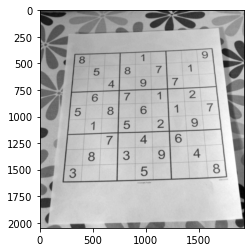

In [3]:
img_blurred = cv2.GaussianBlur(img_gray, (7, 7), 3)

plt.imshow(img_blurred, cmap='gray')

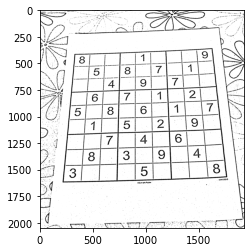

In [14]:
thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(thresh, cmap='gray')

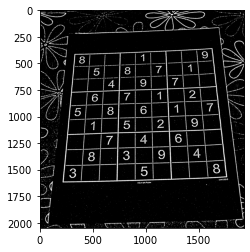

In [5]:
thresh = cv2.bitwise_not(thresh)
plt.imshow(thresh, cmap='gray')

In [6]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = list(contours[0])

In [7]:
contours = sorted(contours, key=cv2.contourArea, reverse=True)

In [8]:
sudoku_contour = None

for contour in contours:
    
    epsilon = 0.1 * cv2.arcLength(contour, True)
    appprox = cv2.approxPolyDP(contour, epsilon, True)
    
    if len(appprox) == 4:
        sudoku_contour = appprox
        break
        
if sudoku_contour is None:
    print("Oops, I can't find sudoku.")

else:
    print(sudoku_contour)
    

[[[1616  359]]

 [[ 326  413]]

 [[ 212 1617]]

 [[1754 1570]]]


True

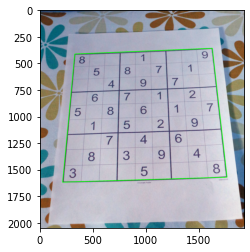

In [9]:
result = cv2.drawContours(img, [sudoku_contour], -1, (0, 255, 0), 5)
plt.imshow(result)

cv2.imwrite('output_sudoku1.jpg', result)